Link for Dataset: http://bit.ly/HDSC-Regression-Dataset

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.cbook import simple_linear_interpolation
from sklearn.linear_model import Ridge, Lasso

## Loading the data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Internship/Homoye/Stage B/dataset/energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [52]:
# shape of the data
data.shape

(19735, 29)

### Quiz Questions:


Q1- The percent of the total variation of the dependent variable Y explained by the set of independent variables X is measured by

**Coefficient of Determination**

Q2- How do you define a Residual?

$Y −  \hat{Y}$

Q3- The straight line graph of the equation Y = a + BX, the slope is horizontal if

**b = 0**

Q4- Which of the one is true about Heteroskedasticity?

**Linear Regression with varying error terms**

Q5-Generally, which of the following method(s) is used for predicting continuous dependent variables?

1. Linear Regression
2. Logistic Regression

**1 only**

Q6- From the following options below, which of these is/are true about “Ridge” or “Lasso” regression methods in case of feature selection?

**Lasso regression uses subset selection of features**

Q7- Which of the following sentences is/are true about outliers in Linear Regression:

**Linear regression is sensitive to outliers**

Q8-Which of the following metrics can be used for evaluating regression models?
1. R Squared

2. Adjusted R Squared

3. F Statistics

4. RMSE / MSE / MAE

**1, 2, 3 and 4**

Q9- A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?

 **75% of the variance in Y is explained by X**

Q10
Which of the following measures is optimal for comparing the goodness of the fit of competing regression models involving the same dependent variable?

**Standard deviation of the residuals**

Q11:
The Lasso can be interpreted as least-squares linear regression where:

**Weights are regularized with the L1 norm**

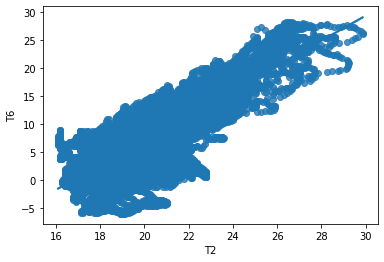

In [6]:
# Q12
sns.regplot(x='T2', y='T6', data=data)

In [7]:
# correlation matrix
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [51]:
# Q13: MAE

data_new= data.drop(columns=['date', 'lights'])
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)
features_df = normalized_df.drop(columns=['Appliances'])
Appliances_target = normalized_df['Appliances']

In [50]:

# create model
linear_model = LinearRegression()
# fit the model to the training dataset
linear_model.fit(x_train, y_train)
# obtain prediction
predicted_values = linear_model.predict(x_test)

In [49]:
# Now, we split our data into training and testing dataset. Recall that we had earlier segmented the features and target variables.

x_train,x_test,y_train,y_test = train_test_split(features_df, Appliances_target, test_size=0.3, random_state=42)


In [43]:
# Mean absolute error
mae = mean_absolute_error(y_test, predicted_values)
print(f'{mae:.2f}')

0.05


In [48]:
# Q14: mean square error
mse = mean_squared_error(y_test, predicted_values)
round(mse, 2)

0.01

In [46]:
# Q15: root mean squred error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [42]:
# Q16: coefficient of determination
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

In [17]:
# Q17
def get_weights_df(model, feat, col_name):
  # this function return the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [19]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
final_weights = pd.DataFrame(linear_model_weights)
final_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [20]:
# Q18: Ridge regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [27]:
# Prediction
y_pred = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse,3)

0.088

In [28]:
# Q19: Lasso Regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.001)

In [26]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Lasso_weight
0,RH_2,-0.456698,-0.000000
1,T_out,-0.321860,0.000000
2,T2,-0.236178,0.000000
3,T9,-0.189941,-0.000000
4,RH_8,-0.157595,-0.000110
5,RH_out,-0.077671,-0.049557
6,RH_7,-0.044614,-0.000000
7,RH_9,-0.039800,-0.000000
8,T5,-0.015657,-0.000000
9,T1,-0.003281,0.000000


In [53]:
# Q20: root mean squred error of lasso regression
y_pred_l = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_l))
round(rmse,3)

0.094